In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [61]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Q2 b)  
Choose 'OverallQual',"TotalBsmtSF",'1stFlrSF','FullBath' as the features of price, they has relevently high correlation coefficients among all numerical features.  


let benchmark = 0.55, correlation coefficients >= 0.55 = high correlation, and correlation coefficients < 0.55 = low correlation. We filtered 7 numerical features that have correlation coefficients > 0.55('OverallQual','TotalBsmtSF','1stFlrSF',"GrLivArea",'FullBath','GarageCars','GarageArea')  


After compared their correlation coefficients with each other, we find that 'OverallQual' is highly correlate with "GrLivArea",'GarageCars','GarageArea', since linear regression is base on the assumption of independent variables need to be uncorrelated with each other, so we drop other top features and only use 'OverallQual',"TotalBsmtSF",'1stFlrSF','FullBath' as the feature. 

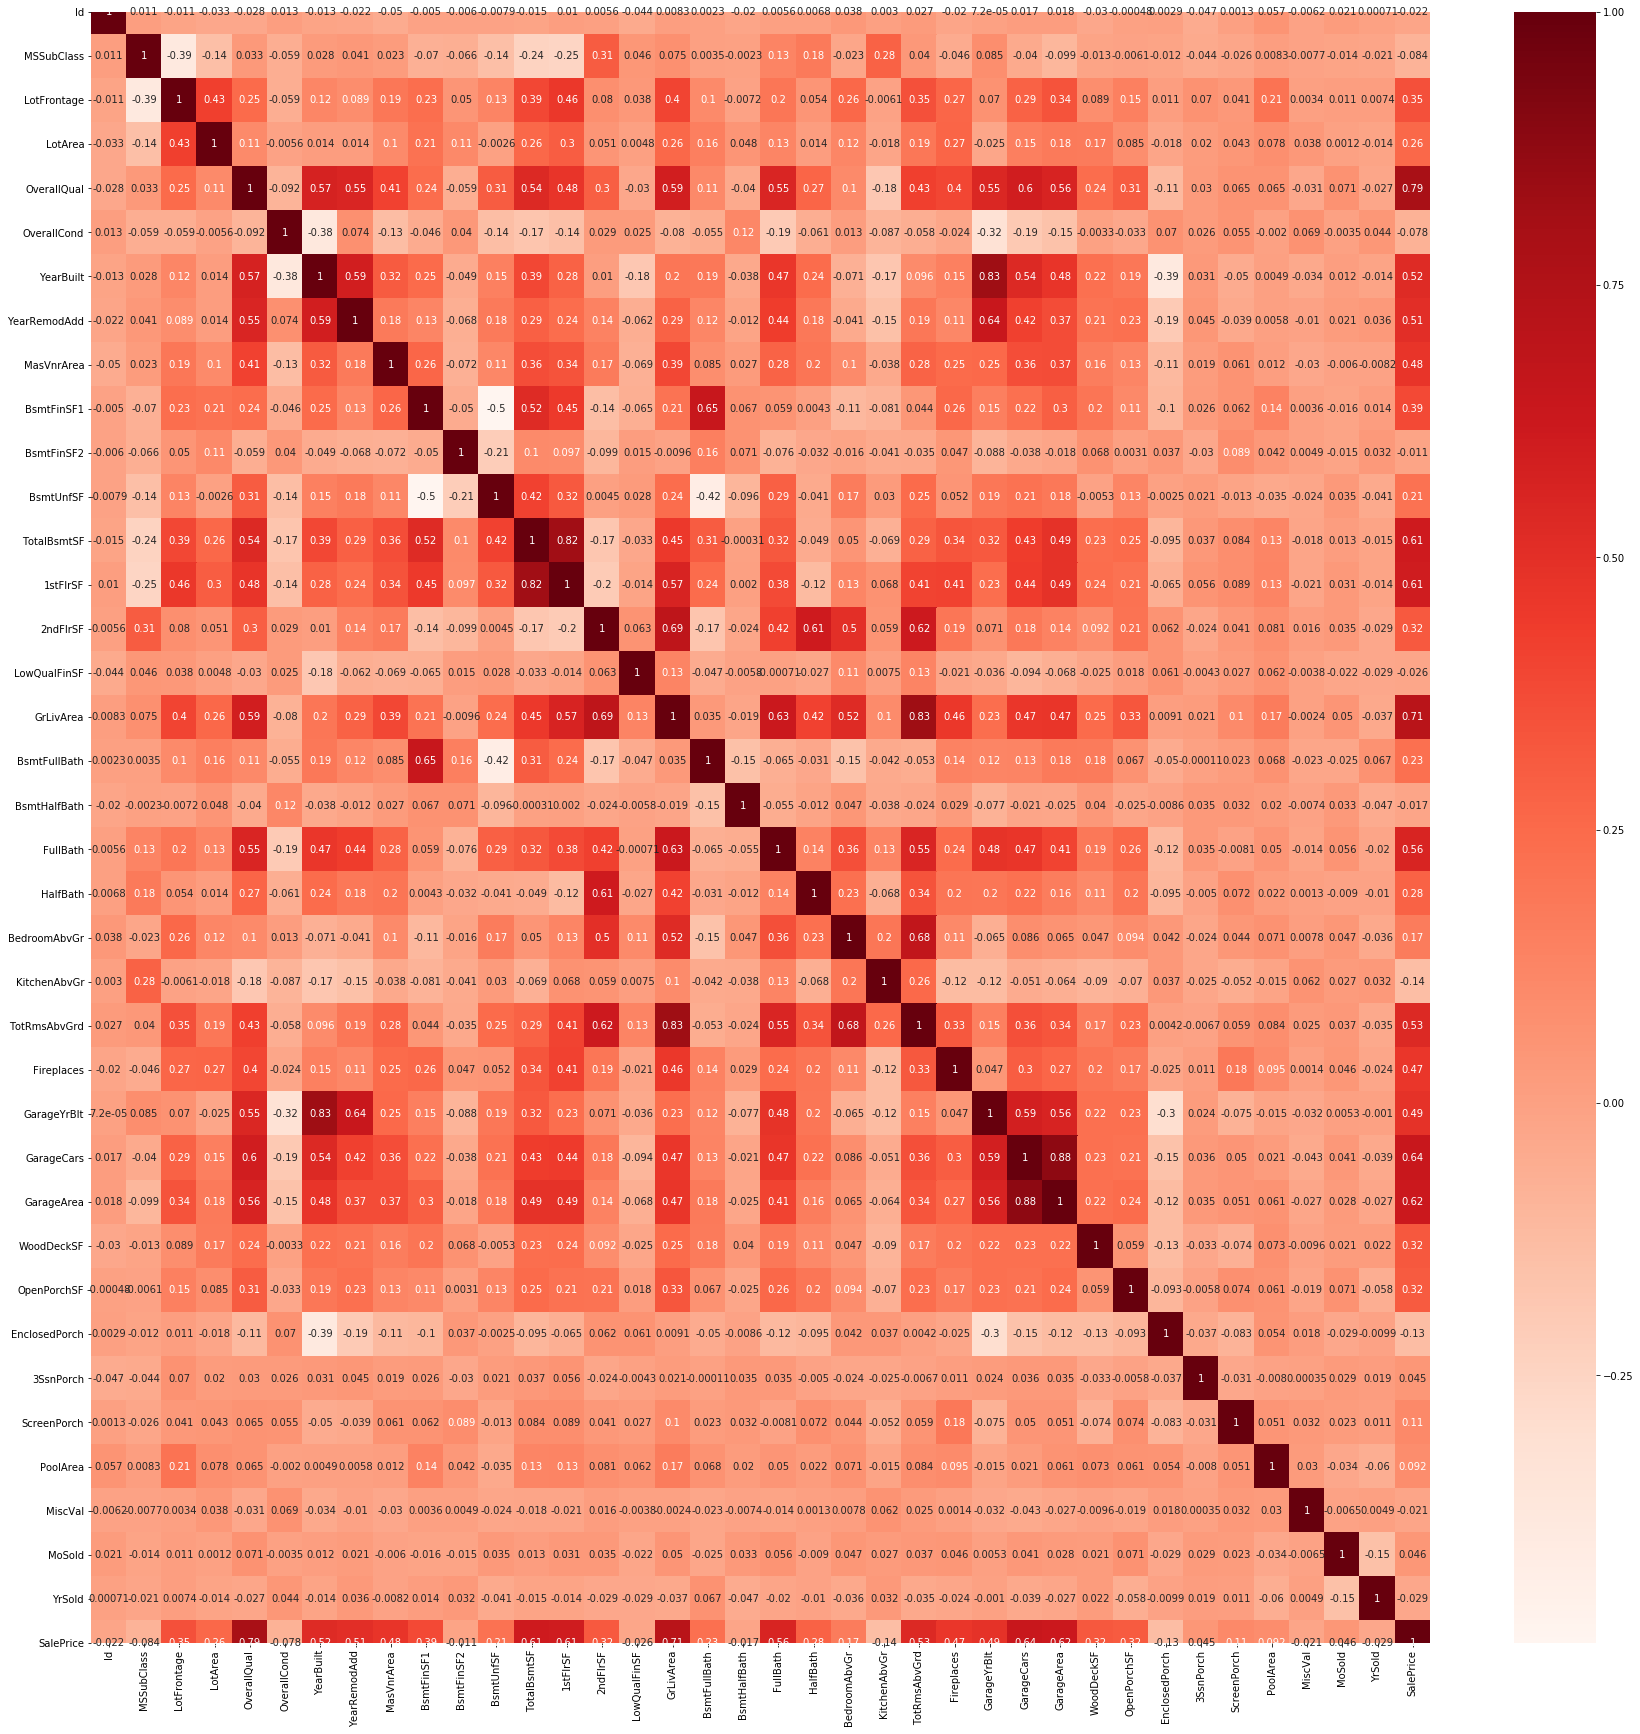

In [62]:
train_number = train.select_dtypes(include=[np.number])
plt.figure(figsize=(30,30))
cor = train_number.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [64]:
#Correlation with output variable
cor_target = abs(cor["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features
['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd',"GrLivArea",'GarageCars','GarageArea']

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [5]:
corr = pd.DataFrame(train_number,columns = ['OverallQual','TotalBsmtSF','1stFlrSF','FullBath',"GrLivArea",'GarageCars','GarageArea']).corr()
corr

,OverallQual,TotalBsmtSF,1stFlrSF,FullBath,GrLivArea,GarageCars,GarageArea
OverallQual,1.000000,0.537808,0.476224,0.550600,0.593007,0.600671,0.562022
TotalBsmtSF,0.537808,1.000000,0.819530,0.323722,0.454868,0.434585,0.486665
1stFlrSF,0.476224,0.819530,1.000000,0.380637,0.566024,0.439317,0.489782
FullBath,0.550600,0.323722,0.380637,1.000000,0.630012,0.469672,0.405656
GrLivArea,0.593007,0.454868,0.566024,0.630012,1.000000,0.467247,0.468997
GarageCars,0.600671,0.434585,0.439317,0.469672,0.467247,1.000000,0.882475
GarageArea,0.562022,0.486665,0.489782,0.405656,0.468997,0.882475,1.000000


In [6]:
#Base on the assumption of independent variable of linear regression
#drop other top features and only use use 'OverallQual',"TotalBsmtSF",'1stFlrSF','FullBath' as the feature.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
reg = LinearRegression()

df_y = pd.DataFrame(train, columns = ['SalePrice'])
df_x = pd.DataFrame(train, columns = ['OverallQual',"TotalBsmtSF",'1stFlrSF','FullBath'])
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(y_pred)
accuracy_linear = r2_score(y_test,y_pred)
RMSE_linear = mean_squared_error(y_test, y_pred)
print('The accuracy of the Linear Regression is',accuracy_linear)
print ('RMSE is: ', RMSE_linear)

[[161414.4584169 ]
 [269764.13741939]
 [126961.10025145]
 [178808.32348827]
 [309008.24214301]
 [ 73241.30003536]
 [192438.69877395]
 [170599.41147127]
 [ 73241.30003536]
 [117835.84339289]
 [203663.07054773]
 [118624.13562626]
 [ 55698.48178118]
 [239885.02466111]
 [175369.3006395 ]
 [126154.06134266]
 [201860.47866661]
 [131267.88931568]
 [158461.90255359]
 [236681.86459317]
 [180878.44525497]
 [230707.5588331 ]
 [164153.48727   ]
 [122187.33875726]
 [234420.65988842]
 [189551.53049039]
 [229407.16328743]
 [ 86133.1484379 ]
 [174511.04068743]
 [230068.28371833]
 [115819.04367488]
 [210888.04657031]
 [201766.85889917]
 [ 90981.36493116]
 [277610.62980749]
 [165293.48033955]
 [134267.39511931]
 [202246.13225131]
 [261949.37151907]
 [106210.36102502]
 [147663.60218223]
 [218866.99559522]
 [122958.64592664]
 [300170.17622902]
 [125052.19395782]
 [185888.52769001]
 [120865.09789546]
 [123234.11277285]
 [346957.34521227]
 [118771.54986428]
 [123401.15449202]
 [209825.89037131]
 [ 99368.479

# Q2 c)   
The L1 regularized least squares has lowest RMSE = 1976603632.480856 with alpha value = 0.0001, the accuracy is 0.7423051407345922;  
The L2 regularized least squares has RMSE = 1976621156.8869123 , the accuracy is 0.7423028560330576;  
From the result, this two methods do not have obviouse difference, and L1 regularized with alpha value = 0.0001 is slightly more accurate than L2 regularized least squares.   
From the result, training regularized and unregularized models do not show significant difference, and L1 regularized with alpha value = 0.0001 is slightly more accurate than unregularized models.

In [7]:
from sklearn.linear_model import Lasso
# L1 regularized least squares = lasso regression
lambda_values = [0.0001, 0.001, 0.01, 0.02,0.05, 0.1, 0.5, 1]
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

lasso_models = []
for i in lambda_values:
    lasso = Lasso(alpha=i, max_iter=1000)
    lasso = lasso.fit(x_train, y_train)
    lasso_models.append(lasso)
  
for i, alpha in enumerate(lambda_values):
    print('Lambda value = ',alpha)
    y_pred_lasso = lasso_models[i].predict(x_test)
    accuracy_lasso = r2_score(y_test,y_pred_lasso)
    RMSE_lasso = mean_squared_error(y_test, y_pred_lasso)
    print('The accuracy of the Linear Regression is',accuracy_lasso)
    print ('RMSE is: ', RMSE_lasso, '\n')

Lambda value =  0.0001
The accuracy of the Linear Regression is 0.7423051407345922
RMSE is:  1976603632.480856 

Lambda value =  0.001
The accuracy of the Linear Regression is 0.7423051408252908
RMSE is:  1976603631.785168 

Lambda value =  0.01
The accuracy of the Linear Regression is 0.7423051417311036
RMSE is:  1976603624.837288 

Lambda value =  0.02
The accuracy of the Linear Regression is 0.7423051427378864
RMSE is:  1976603617.1149359 

Lambda value =  0.05
The accuracy of the Linear Regression is 0.7423051457626759
RMSE is:  1976603593.9138138 

Lambda value =  0.1
The accuracy of the Linear Regression is 0.7423051508001932
RMSE is:  1976603555.2744129 

Lambda value =  0.5
The accuracy of the Linear Regression is 0.7423051909429679
RMSE is:  1976603247.366236 

Lambda value =  1
The accuracy of the Linear Regression is 0.7423052409293959
RMSE is:  1976602863.9540272 



In [8]:
from sklearn.linear_model import Ridge
# L2 regularized least squares = redge regression
ridge = Ridge()
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print(y_pred)
accuracy_ridge = r2_score(y_test, y_pred)
RMSE_ridge = mean_squared_error(y_test, y_pred)
print('The accuracy of the Ridge Regression is', accuracy_ridge)
print ('RMSE is: ', RMSE_ridge)


[[161446.74946644]
 [269739.2118631 ]
 [126999.76565349]
 [178778.3918661 ]
 [308980.92191288]
 [ 73270.76112899]
 [192460.75380665]
 [170562.80069504]
 [ 73270.76112899]
 [117866.97093189]
 [203618.8698489 ]
 [118656.04910912]
 [ 55748.11099897]
 [239870.28955031]
 [175336.49544909]
 [126192.13294908]
 [201814.86157402]
 [131309.73210801]
 [158491.81954785]
 [236664.49810223]
 [180882.53746438]
 [230650.91472756]
 [164111.63178891]
 [122222.18285299]
 [234401.53527935]
 [189530.34004299]
 [229383.95946347]
 [ 86173.09894126]
 [174477.61259535]
 [230045.61781282]
 [115847.34869187]
 [210849.74958885]
 [201713.52636599]
 [ 91025.2601698 ]
 [277592.16394243]
 [165328.95582443]
 [134312.29436896]
 [202200.82894447]
 [261918.15978066]
 [106229.43386863]
 [147684.73317518]
 [218834.35476862]
 [122994.1175939 ]
 [300170.10671592]
 [125089.3690335 ]
 [185863.82263674]
 [120898.8661543 ]
 [123269.80857279]
 [346926.4415093 ]
 [118803.6147147 ]
 [123436.63425098]
 [209821.19608963]
 [ 99383.650

# Q2 d)

In [56]:
#deal with NaN
#filling with their average in training data
df_y = pd.DataFrame(train, columns = ['SalePrice'])
df_x = pd.DataFrame(train, columns = ['OverallQual',"TotalBsmtSF",'1stFlrSF','FullBath'])
x_test = pd.DataFrame(test, columns = ['OverallQual',"TotalBsmtSF",'1stFlrSF','FullBath'])
x_test.fillna(value={"OverallQual":6.099315068})
x_test.fillna(value={"TotalBsmtSF":1057.429452})
x_test.fillna(value={'1stFlrSF':1162.626712})
x_test.fillna(value={'FullBath':1.565068493})
index_Xna = int(np.where(np.isnan(x_test))[0])
index_Yna = int(np.where(np.isnan(x_test))[1])
x_test.iloc[index_Xna, index_Yna] = 1057


In [57]:
#OLS
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
final = pd.DataFrame(test.iloc[:,0])
final['SalePrice'] = y_pred
final.head()
final.to_csv('OLS submission')
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
final = pd.DataFrame(test.iloc[:,0])
final['SalePrice'] = y_pred
final.head()
final.to_csv('OLS_submission.csv', index = False)

In [58]:
#L1 with alpha = 0.0001
lasso = Lasso(alpha=0.0001, max_iter=1000)
lasso = lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
final = pd.DataFrame(test.iloc[:,0])
final['SalePrice'] = y_pred_lasso
final.to_csv('L1_submission.csv', index = False)
final.head()

,Id,SalePrice
0,1461,119777.224223
1,1462,175926.500859
2,1463,142533.759477
3,1464,174511.040477
4,1465,258189.028734


In [59]:
#L2
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
final = pd.DataFrame(test.iloc[:,0])
final['SalePrice'] = y_pred_lasso
final.to_csv('L2_submission.csv', index = False)
final.head()

,Id,SalePrice
0,1461,119777.224223
1,1462,175926.500859
2,1463,142533.759477
3,1464,174511.040477
4,1465,258189.028734
